In [ ]:
import os
import time
import math

import numpy as np
import pandas as pd
import cv2
%matplotlib inline
import matplotlib.pyplot as plt



import matplotlib.image as mpimg

from sklearn.decomposition.pca import PCA
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.pipeline import Pipeline

import warnings
import tensorflow as tf

In [ ]:
train_dir = '/home/analyst/Рабочий стол/ml/google landmark/train'
test_dir = '/home/analyst/Рабочий стол/ml/google landmark/test'

In [ ]:
train_files = os.listdir(train_dir)
test_files = os.listdir(test_dir)

In [ ]:
img1 = cv2.imread(train_dir + '/' + train_files[64])
plt.imshow(img1)

In [ ]:
img2 = cv2.imread(test_dir + '/' + test_files[1])
plt.imshow(img2)

In [ ]:
def image_detect_and_compute(detector, img_name):
    """Detect and compute interest points and their descriptors."""
    img = cv2.imread(os.path.join(train_dir, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp, des = detector.detectAndCompute(img, None)
    return img, kp, des
    

def draw_image_matches(detector, img1_name, img2_name, nmatches=10):
    """Draw ORB feature matches of the given two images."""
    img1, kp1, des1 = image_detect_and_compute(detector, img1_name)
    img2, kp2, des2 = image_detect_and_compute(detector, img2_name)
    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x: x.distance) # Sort matches by distance.  Best come first.

    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:nmatches], img2, flags=2) # Show top 10 matches
    plt.figure(figsize=(7, 7))
    plt.title(type(detector))
    plt.imshow(img_matches); plt.show()
    

orb = cv2.ORB_create()
draw_image_matches(orb, train_files[64], train_files[64])

In [ ]:
a = [0,45,45666,4]
b = {i: a[i] for i in range(0, len(a), 1)}
print(b)

In [ ]:
%%time
# img2 test

i = 0
max_iter = 10000
detector = cv2.ORB_create()
distes = []
img2, kp2, des2 = image_detect_and_compute(detector, train_files[0])
for train_file in train_files:
        if i <= max_iter:
        img1, kp1, des1 = image_detect_and_compute(detector, train_file)
        bf = cv2.S(cy, crossCheck=True)
        matches = bf.match(des1, des2)
        matches = sorted(matches, key = lambda x: x.distance)
        dist = 0
        for match  in matches[0:11]:
            dist = dist + match.distance
            distes.append(dist/12)
            i = i + 1
b = {i: distes[i] for i in range(0, len(distes), 1)}


In [ ]:
b = {i: distes[i] for i in range(0, len(distes), 1)}

In [ ]:
sorted(b.items(), key=lambda x: x[1])[0:30]

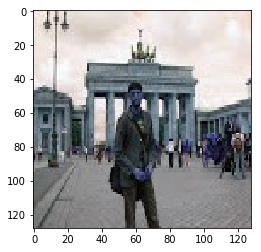

In [143]:
img1 = cv2.imread(train_dir + '/' + train_files[3769])
plt.imshow(img1)

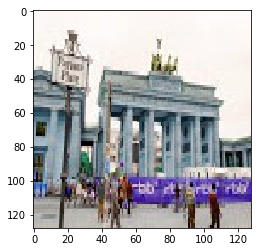

In [144]:
img1 = cv2.imread(train_dir + '/' + train_files[0])
plt.imshow(img1)

In [ ]:
print(img.mean(), img.sum())

In [ ]:
print(img.shape, hog.compute(img).shape)

In [ ]:
hog = cv2.HOGDescriptor()

hog.compute(img)


In [ ]:
filenames = [file for file in os.listdir(train_dir)]
filenames = [filenames[i] for i in imgs_train]
filenames_test = [file for file in os.listdir(test_dir)]

In [ ]:
df1 = pd.DataFrame(data = [img.ravel() for img in imgs_train])
df2 = pd.DataFrame(data = filenames, columns = ['FileName'])